<br>**Dynamic Quantization**</br>
There are two ways of quantizing a model: dynamic and static. Dynamic quantization calculates the quantization parameters (scale and zero point) for activations dynamically. These calculations increase the cost of inference, while usually achieve higher accuracy comparing to static ones.

Python API for dynamic quantization is in module *onnxruntime.quantization.quantize*, function *quantize_dynamic()*

In general, it is recommended to use dynamic quantization for RNNs and transformer-based models, and static quantization for CNN models.

In [1]:
import os
import onnxruntime

from onnxruntime.quantization.preprocess import quant_pre_process as preprocess


In [10]:
#Path to hrnet model
model_path = os.path.join("..","models","hrnet_pose.onnx")
output_model = os.path.join("..","models","hrnet_pose_preprocessed.onnx")
model_path

'..\\models\\hrnet_pose.onnx'

In [11]:
os.getcwd()

'C:\\Users\\DFS\\Desktop\\gitrepo\\qnn_sample_apps\\notebooks'

In [12]:
help(onnxruntime.quantization.preprocess)

Help on module onnxruntime.quantization.preprocess in onnxruntime.quantization:

NAME
    onnxruntime.quantization.preprocess

DESCRIPTION
    # --------------------------------------------------------------------------
    # Copyright (c) Microsoft, Intel Corporation. All rights reserved.
    # Licensed under the MIT License. See License.txt in the project root for
    # license information.
    # --------------------------------------------------------------------------

FUNCTIONS
    parse_arguments()

DATA
    logger = <Logger onnxruntime.quantization.preprocess (WARNING)>

FILE
    c:\users\dfs\desktop\projects\env_onnx\lib\site-packages\onnxruntime\quantization\preprocess.py




In [13]:
help(preprocess)

Help on function quant_pre_process in module onnxruntime.quantization.shape_inference:

quant_pre_process(input_model: Union[str, pathlib.Path, onnx.onnx_ml_pb2.ModelProto, NoneType] = None, output_model_path: Union[str, pathlib.Path, NoneType] = None, skip_optimization: bool = False, skip_onnx_shape: bool = False, skip_symbolic_shape: bool = False, auto_merge: bool = False, int_max: int = 2147483647, guess_output_rank: bool = False, verbose: int = 0, save_as_external_data: bool = False, all_tensors_to_one_file: bool = False, external_data_location: Optional[str] = None, external_data_size_threshold: int = 1024, **deprecated_kwargs) -> None
    Shape inference and model optimization, in preparation for quantization.
    
    Args:
        input_model: Path to the input model file or ModelProto
        output_model_path: Path to the output model file
        skip_optimization: Skip model optimization step if true. This may result in ONNX shape
            inference failure for some mode

# What does preprocessing model do?!?!
## https://onnxruntime.ai/docs/performance/model-optimizations/quantization.html
### TLDR: Prepares the model for quantization by rewriting computation graph, eliminating redundancies, etc as well as performing shape inferencing

In [14]:
preprocessed_model = preprocess(input_model=model_path, output_model_path=output_model, verbose=3)
preprocessed_model

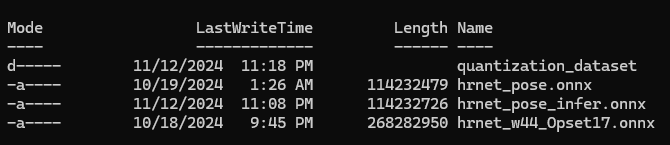

In [15]:
# Explore model differences after preprocessing
from onnxruntime.quantization import quantize_dynamic, QuantType

quantized_model_path = os.path.join("..","models","hrnet_pose.quant.onnx")

# Use preprocessed model
# Calibration data set not needed with dynamic quantization
# Recommended to use static computation for CNN models and dynamic for RNN and transformer based models
quantized_model = quantize_dynamic(output_model, quantized_model_path)
quantized_model